<a href="https://colab.research.google.com/github/ririssilvia/TugasPertemuan3-Regression/blob/main/Js02_regression_HargaMinyak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02 - Regression

Isikan identitas berikut
*   NIM     : 2241727029
*   Nama    : Riris Silvia Zahri
*   Kelas   : TI-4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('CrudeOil.csv')
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jul 01, 2022",106.01,109.34,104.56,108.43,108.43,"305,338"
1,"Jun 30, 2022",109.70,110.45,105.10,105.76,105.76,"362,890"
2,"Jun 29, 2022",111.86,114.05,109.22,109.78,109.78,"322,060"
3,"Jun 28, 2022",110.18,112.22,109.62,111.76,111.76,"306,748"
4,"Jun 27, 2022",107.22,110.54,105.60,109.57,109.57,"282,914"


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5029 non-null   object 
 1   Open         5029 non-null   float64
 2   High         5029 non-null   float64
 3   Low          5029 non-null   float64
 4   Close*       5029 non-null   float64
 5   Adj Close**  5029 non-null   float64
 6   Volume       5029 non-null   object 
dtypes: float64(5), object(2)
memory usage: 275.1+ KB


,Open,High,Low,Close*,Adj Close**
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,66.385892,67.402688,65.301756,66.389781,66.389781
std,24.399530,24.627353,24.152038,24.418439,24.418439
min,-14.000000,13.690000,-40.320000,-37.630000,-37.630000
25%,47.890000,48.690000,46.960000,47.850000,47.850000
50%,62.750000,63.610000,61.860000,62.790000,62.790000
75%,86.200000,87.400000,85.060000,86.200000,86.200000
max,145.190000,147.270000,143.220000,145.290000,145.290000


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


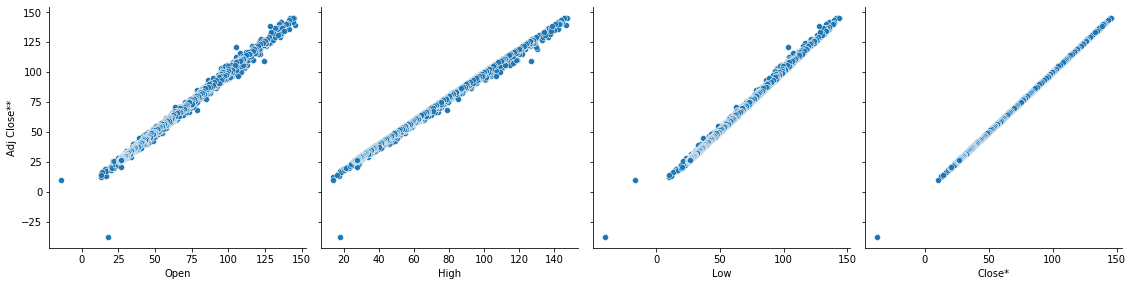

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Open', 'High', 'Low','Close*'], 
             y_vars='Adj Close**', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

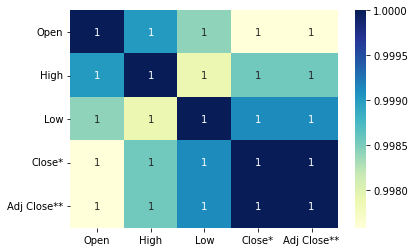

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat open, high, low,
close* memiliki korelasi yang paling kuat terhadap adj close**

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Close*']
y = data['Adj Close**']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

1360     52.34
139      71.29
305      62.44
4335     51.86
1859     51.21
         ...  
4149     64.21
1890     53.61
350      59.47
79      106.02
3927     59.24
Name: Adj Close**, Length: 3520, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    -6.883383e-15
Close*    1.000000e+00
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Adj Close**   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.065e+34
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:18:25   Log-Likelihood:             1.0726e+05
No. Observations:                3520   AIC:                        -2.145e+05
Df Residuals:                    3518   BIC:                        -2.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.883e-15   6.88e-16    -10.008      0.000   -8.23e-15   -5.53e-15
Close*         1.0000   9.69e-18   1.03e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                     3553.733   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392408.291
Skew:                           4.680   Prob(JB):                         0.00
Kurtosis:                      53.871   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

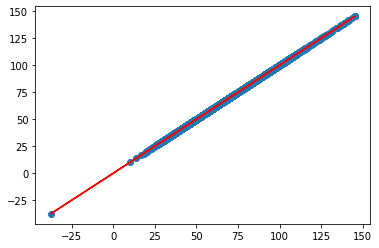

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -6.883383e-15 + 1.000000e+00*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


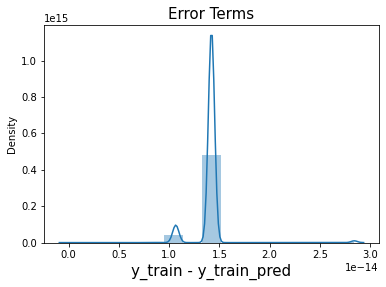

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

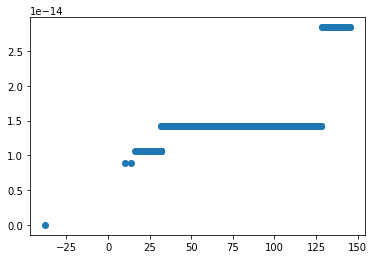

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3948    59.35
2453    92.48
302     62.14
3633    90.99
1490    40.06
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

1.0

perlu diperhatikan bahwa r^2 dari data trainign adalah 1.000 sedangkan dari data testing adalah 1.0. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

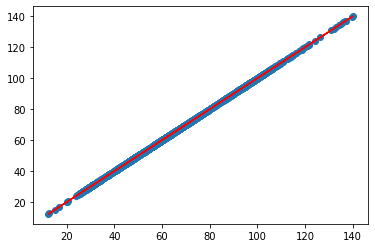

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()